In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Libraries and Data

In [2]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv('../input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
print('Shape of Train dataset: ',train.shape)
print('Shape of Test dataset: ',test.shape)

Shape of Train dataset:  (8693, 14)
Shape of Test dataset:  (4277, 13)


* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Missing Values

<AxesSubplot:>

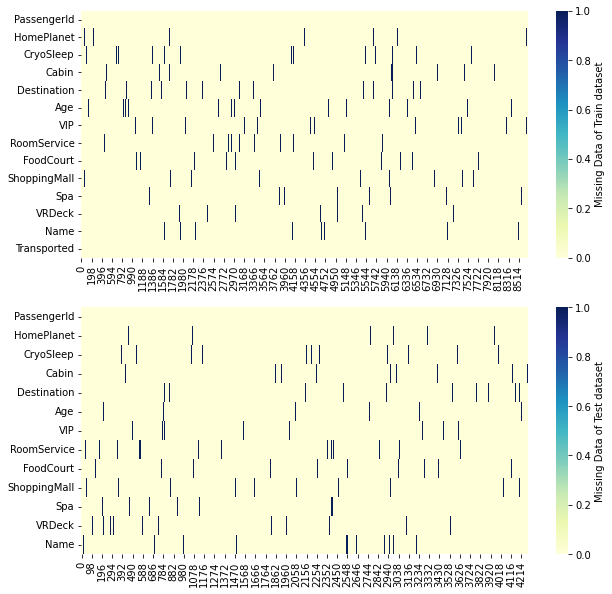

In [5]:
fig, axes = plt.subplots(2, figsize=(10, 10))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data of Train dataset'}, ax=axes[0])

sns.heatmap(test.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data of Test dataset'}, ax=axes[1])

In [6]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [7]:
cat_cols = [col for col in train.columns if train[col].dtype in (object, bool)]

# fig, axes = plt.subplots(2, 3, figsize=(10, 8))
# for col, ax in zip(cat_cols, axes.flatten()):
#     sns.countplot(train[col], ax=ax)
#     ax.set_title(col)
    
for col in cat_cols:
    train[col]= train[col].fillna(train[col].mode()[0])
    if col != 'Transported':
        test[col] = test[col].fillna(test[col].mode()[0])

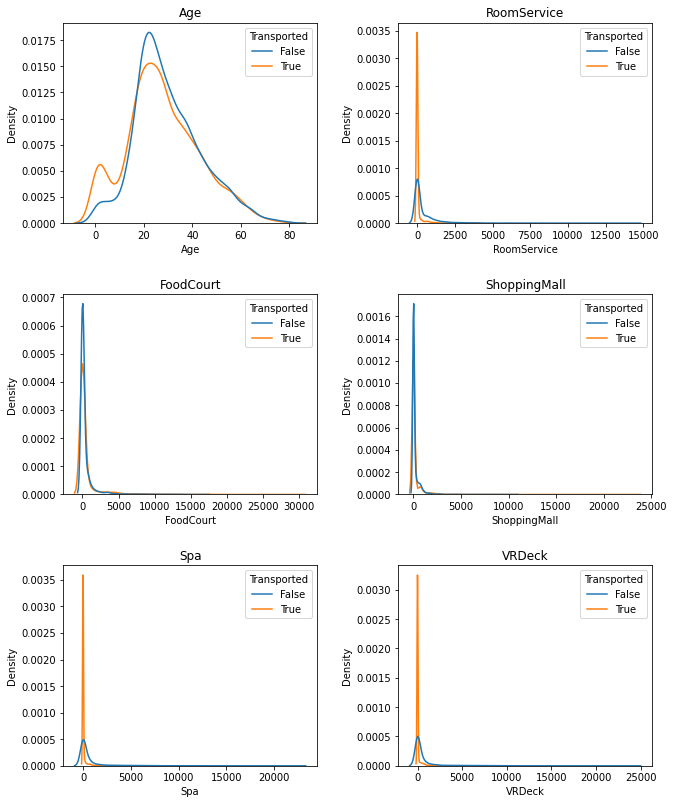

In [8]:
num_cols = [col for col in train.columns if col not in cat_cols]

fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.tight_layout(pad=5.0)
for col, ax in zip(num_cols, axes.flatten()):
    sns.kdeplot(x= col, hue='Transported', data = train, ax=ax)
    ax.set_title(col)
    
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())
    if col != 'Transported':
        test[col] = test[col].fillna(test[col].median())
    

In [9]:
#Analyzing Cabin feature
train[['Deck','Num','Side']] = train.Cabin.str.split('/',expand=True)
test[['Deck','Num','Side']] = test.Cabin.str.split('/',expand=True)

train['Num'] = train['Num'].astype('int')
test['Num'] = test['Num'].astype('int')

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [10]:
train[['group', 'number']] = train['PassengerId'].str.split('_', expand=True).astype('int')
test[['group', 'number']] = test['PassengerId'].str.split('_', expand=True).astype('int')

train.drop('PassengerId', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [11]:
print('Length of Groups', train['group'].shape[0])
print('Uniques of Groups', len(train['group'].unique()))

Length of Groups 8693
Uniques of Groups 6217


In [12]:
train.drop('group', axis=1, inplace=True)
test.drop('group', axis=1, inplace=True)

# Class Distribution

([<matplotlib.patches.Wedge at 0x7fd56d969110>,
 [Text(-0.012522008688130765, 1.0999287246446539, 'True'),
  Text(0.01252200868813063, -1.0999287246446539, 'False')])

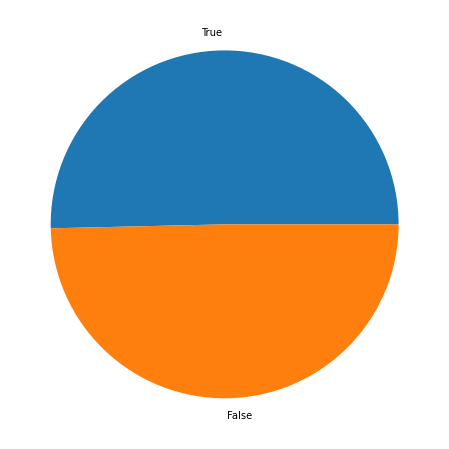

In [13]:
plt.figure(figsize=(10, 8))
#sns.countplot(train['Transported'])
#plt.title('Class Distribution of Target Vairable')

values = train['Transported'].value_counts()
label = train['Transported'].value_counts().index
plt.pie(values, labels=label)


In [14]:
train['Transported'] = train['Transported'].astype('object')

train['CryoSleep'] = train['CryoSleep'].astype('object')
test['CryoSleep'] = test['CryoSleep'].astype('object')

train['VIP'] = train['VIP'].astype('object')
test['VIP'] = test['VIP'].astype('object')

# Chi-Square Independence Test

In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import OrdinalEncoder
cat_cols = [col for col in train.columns if train[col].dtype in (object, bool)]
temp = train[cat_cols]

ordi = OrdinalEncoder()
temp = ordi.fit_transform(temp)
x = temp[:, :4]
y = temp[:, -1]

chi2_model = SelectKBest(chi2, k='all')
chi2_model.fit(x, y)
chi2_model.get_support()


array([ True,  True,  True,  True])

# ANOVA Test

In [16]:
num_cols = [col for col in train.columns if col not in cat_cols]
x = train[num_cols]
anova_model = SelectKBest(f_classif, k='all')
anova_model.fit(x, y)
anova_model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True])

# Splitting Dataset

In [17]:
data = pd.concat([train, test], axis=0)
data_transformed = pd.get_dummies(data, drop_first=True)


train_transformed = data_transformed.iloc[:train.shape[0], :]
test_transformed = data_transformed.iloc[train.shape[0]:, :]
test_transformed.drop('Transported_True', axis=1, inplace=True)

y = train_transformed['Transported_True']
x = train_transformed.drop('Transported_True', axis=1)

from sklearn.model_selection import train_test_split, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1234)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
print('Shape of Train ', train_transformed.shape)
print('Shape of Test ', test_transformed.shape)

Shape of Train  (8693, 23)
Shape of Test  (4277, 22)


# Hyper-Parameter Tuning

In [19]:
def compute_model(model_obj, params):
    grid_model = GridSearchCV(model_obj, params, cv=3)
    grid_model.fit(xtrain, ytrain)
    
    ypred_train = grid_model.best_estimator_.predict(xtrain)
    #ypred_train = model.predict(xtrain)

    from sklearn.metrics import accuracy_score
    train_accuracy = accuracy_score(ytrain, ypred_train)
    

    ypred = grid_model.best_estimator_.predict(xtest)
    #ypred = model.predict(xtest)
    test_accuracy = accuracy_score(ytest, ypred)
    


    results = grid_model.best_estimator_.predict(test_transformed)
    #results = model.predict(test_transformed)

    return model_obj, results, train_accuracy, test_accuracy, grid_model.best_estimator_


# Data Modeling

In [20]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_params = {}
lr_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(lr_model, lr_params)

model_results = list()
model_prediction = dict()


model_results.append([lr_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['lr'] = results
print(lr_model, train_accuracy, test_accuracy, best_estimator)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression() 0.7920235203885977 0.7988505747126436 LogisticRegression()


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb_param_grid = {'max_depth': [5, 6, 7], 'learning_rate': [0.1, 0.2, 0.5, 0.8, 0.05], 'n_estimators': [100, 150, 200, 250, 280]}
gb_model = GradientBoostingClassifier()

gb_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(gb_model, gb_param_grid)

model_results.append([gb_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['gb'] = results
print(gb_model, train_accuracy, test_accuracy, best_estimator)


GradientBoostingClassifier() 0.9000383484596702 0.8275862068965517 GradientBoostingClassifier(max_depth=5, n_estimators=200)


In [22]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier(iterations=1500, eval_metric='Accuracy', verbose=0)
cat_param_grid = {'max_depth': [4, 5, 6, 7], 'learning_rate': [0.1, 0.2, 0.5, 0.8, 0.05], 'iterations': [100, 150, 200, 250, 280]}
cat_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(cat_model, cat_param_grid)

model_results.append([cat_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['cat'] = results
print(cat_model, train_accuracy, test_accuracy, best_estimator)



<catboost.core.CatBoostClassifier object at 0x7fd56d969190> 0.8540201968554263 0.8310344827586207 <catboost.core.CatBoostClassifier object at 0x7fd560e4e250>


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {'n_estimators': [100, 150, 200, 250, 280], 'max_depth': [3, 4, 5, 6, 7]}
rf_model = RandomForestClassifier()
rf_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(rf_model, rf_param_grid)

model_results.append([rf_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['rf'] = results
print(rf_model, train_accuracy, test_accuracy, best_estimator)


RandomForestClassifier() 0.8108142656269973 0.7919540229885057 RandomForestClassifier(max_depth=7, n_estimators=280)


In [24]:
#Adaboosting classifier
from sklearn.ensemble import AdaBoostClassifier
ab_param_grid = {'learning_rate':[0.1, 0.2, 0.5, 0.8, 0.05], 'n_estimators': [100, 150, 200, 250, 280]}
ab_model = AdaBoostClassifier()
ab_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(ab_model, ab_param_grid)

model_results.append([ab_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['ab'] = results
print(ab_model, train_accuracy, test_accuracy, best_estimator)


AdaBoostClassifier() 0.8031445736929567 0.8068965517241379 AdaBoostClassifier(learning_rate=0.2, n_estimators=200)


In [25]:
#Extreme Gradient boost classifier
from xgboost import XGBClassifier
xg_param_grid = {'learning_rate': [0.1, 0.2, 0.5, 0.8, 0.05], 'n_estimators': [100, 150, 200, 250, 280], 'max_depth': [3, 4, 5, 6, 7]}
xg_model = XGBClassifier()
xg_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(xg_model, xg_param_grid)

model_results.append([xg_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['xg'] = results
print(xg_model, train_accuracy, test_accuracy, best_estimator)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...) 0.8708935191103158 0.828735632183908 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              e

In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_param_grid = {'max_depth': [3, 4, 5, 6, 7]}
dt_model = DecisionTreeClassifier()
dt_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(dt_model, dt_param_grid)

model_results.append([dt_model, train_accuracy, test_accuracy, best_estimator])
model_prediction['dt'] = results
print(dt_model, train_accuracy, test_accuracy, best_estimator)


DecisionTreeClassifier() 0.8009714943116452 0.7758620689655172 DecisionTreeClassifier(max_depth=7)


In [27]:
# #SVM
# from sklearn.svm import SVC
# sv_param_grid = {'C': [0.1, 0.3, 0.5, 0.7, 1], 'kernel': ['linear', 'rbf', 'poly']}
# sv_model = SVC()
# sv_model, results, train_accuracy, test_accuracy, best_estimator = compute_model(sv_model, sv_param_grid)

# model_results.append([sv_model, train_accuracy, test_accuracy, best_estimator])
# model_prediction['sv'] = results
# print(sv_model, train_accuracy, test_accuracy, best_estimator)


In [28]:
results = pd.DataFrame(model_results, columns = ['Model Name', 'Training Accuracy', 'Test Accuracy', 'Best Parameters'])
results

,Model Name,Training Accuracy,Test Accuracy,Best Parameters
0,LogisticRegression(),0.792024,0.798851,LogisticRegression()
1,GradientBoostingClassifier(),0.900038,0.827586,([DecisionTreeRegressor(criterion='friedman_ms...
2,<catboost.core.CatBoostClassifier object at 0x...,0.854020,0.831034,<catboost.core.CatBoostClassifier object at 0x...
3,RandomForestClassifier(),0.810814,0.791954,"(DecisionTreeClassifier(max_depth=7, max_featu..."
4,AdaBoostClassifier(),0.803145,0.806897,"(DecisionTreeClassifier(max_depth=1, random_st..."
5,"XGBClassifier(base_score=None, booster=None, c...",0.870894,0.828736,"XGBClassifier(base_score=0.5, booster='gbtree'..."
6,DecisionTreeClassifier(),0.800971,0.775862,DecisionTreeClassifier(max_depth=7)


In [29]:
# plt.figure(figsize=(10, 6))
# sns.barplot(x = results['Model Name'].astype('category'), y = results['Training Accuracy'])
# plt.ylim(0.7, 1.0)
# plt.xticks(rotation=90)

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score
estimators = [('xg', xg_model), ('gb', gb_model)]
st_model = StackingClassifier(estimators = estimators, final_estimator=cat_model, cv=5)
st_model.fit(xtrain , ytrain)
ypred_train = st_model.predict(xtrain)

train_accuracy = accuracy_score(ytrain, ypred_train)
ypred = st_model.predict(xtest)
test_accuracy = accuracy_score(ytest, ypred)
    
st_results = st_model.predict(test_transformed)
print(train_accuracy, test_accuracy)

0.8572159018279433 0.8275862068965517


In [31]:
sample = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sample['Transported'] = [True if x==1 else False for x in model_prediction['cat']]
sample.to_csv('Submission.csv', index=False)